In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from collections import defaultdict
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import pandas as pd
import imutils
from skimage.feature import hog
from skimage import data, exposure

In [2]:
img = sorted(os.listdir("train"))
train_mask = sorted(os.listdir("train_mask"))
test_images = sorted(os.listdir("test"))
images = defaultdict(list)

In [3]:
for i in img:    
    train = cv2.imread("train/{}".format(i))
    images['train_images'].append(train.ravel())
    images['train_images_path'].append(i)

In [4]:
for a in train_mask:
    train_mask_img = cv2.imread("train_mask/{}".format(a)) 
    images['train_mask'].append(train_mask_img.ravel())
    images['train_mask_path'].append(a)

In [5]:
for qq in test_images:
    test_images_img = cv2.imread("test/{}".format(qq))    
    images['test_images_img'].append(test_images_img.ravel())
    images['test_images_img_path'].append(qq)

In [6]:
X = np.array(images['train_images'])
Y = np.array(images['train_mask'])
M = np.array(images['train_mask_path'])
T = np.array(images['train_images_path'])
Z = np.array(images['test_images_img'])
W = np.array(images['test_images_img_path'])

In [7]:
from sklearn.preprocessing import MultiLabelBinarizer
scale_features_std = MultiLabelBinarizer()
features_train = scale_features_std.fit_transform(Y)

In [8]:
features_train.shape

(1491, 2)

In [9]:
X.shape

(1491, 230400)

In [10]:
M.shape

(1491,)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, features_train, random_state=0)

In [12]:
mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=[10,10],
                    alpha=0.1, activation="relu",
                    learning_rate_init=0.7, random_state=0)

In [13]:
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=[10, 10], learning_rate='constant',
       learning_rate_init=0.7, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

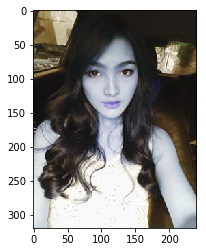

In [14]:
tes_i = cv2.imread("test/{}".format(W[1]))
plt.imshow(tes_i)
predict = mlp.predict([tes_i.ravel()])

In [15]:
predict

array([[1, 1]])

In [16]:
plt.imsave("predict.jpg",predict)

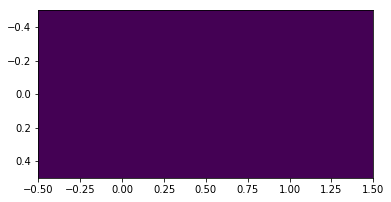

In [21]:
p_img = cv2.imread("predict.jpg")
plt.imshow(p_img)

In [18]:
mlp.score(X_train,y_train)

1.0